# Bank Marketing Analysis

For this capstone, I will provide a demonstration on how data science and machine learning can be used as a business consulting tool by helping a European Bank improve their marketing campaing. The data I am working with is provided through [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Data
The data is direct marketing campaigns in the form of phone calls. UCI provided four varations of the dataset. For this project, we chose the full bank dataset, consisting of 41188 data points and 20 variables. Of the 20 variables, 10 are categorical features and the remaining 10 are numeric features. Our target variable is y, which tells us whether the client has subscribed to term deposit.    

### Features
##### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

##### Related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

##### Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')
---
# Business Goals

__Stakeholders:__ 
  *  Bank Marketing Team
  *  Bank Employees
  *  Clients

__Business Problem:__ We have been contacted by a European bank that has had a decline in revenue. Their marketing team is continuously calling the 'wrong' customers leading to high labor costs, and ultimately harming the customer relationship. The bank has asked us to help them identify which of their existing client base have a higher chance to sign up for term deposit to better focus their marketing efforts on such clients .

__Goals:__ Gain revenue and lower costs by improving effectiveness of marketing by accurately targeting clients.

__Research Question:__ Which customers are more likely to respond to bank's marketing campaigns? 

__Objective:__ A classification approach to predicting which clients are more likely to subscribe to term deposits.

# Imports

In [2]:
# import the libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, roc_auc_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, auc, f1_score, precision_score, roc_curve, recall_score

from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings('ignore')

In [8]:
# upload data
os.getcwd()

# bank_full dataset
bank_data = pd.read_csv(r'C:\Users\Elizabeth\Desktop\data_science\Thinkful\bank\bank_additional_full.csv', sep=';')
bank_data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
# renaming target variable y to better describe its purpose
bank_data = bank_data.rename(columns={"y": 'term_deposit'})

# Exploratory Data Analysis

In [12]:
# number of rows, number of features
bank_data.shape

(41188, 21)

In [13]:
# descriptive statistics of data
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [14]:
# let's take a look at the values for categorical variable
categorical_col = [col for col in bank_data.columns 
                   if bank_data[col].dtypes == 'object']

for col in categorical_col:
    print(col, '\n')
    print(bank_data[col].value_counts())
    print('----------------------------\n')

job 

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
----------------------------

marital 

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
----------------------------

education 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
----------------------------

default 

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------

housing 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
------------

In [15]:
# view distribution of target variable
bank_data.term_deposit.value_counts()

no     36548
yes     4640
Name: term_deposit, dtype: int64

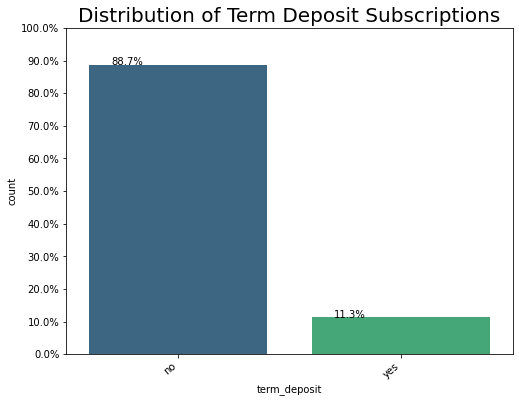

In [16]:
plt.figure(figsize=(8,6))
Y = bank_data.term_deposit
total = len(Y)*1.
ax=sns.countplot(x="term_deposit", data=bank_data, palette='viridis')

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks(10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Distribution of Term Deposit Subscriptions', fontsize=20)
plt.show()

From above distribution, we note that the data is imbalanced. We will run our models with 3 variatious of the dataset. First-most, I will run models with the imbalanced data. Then, I will use 2 different techniques to handle this imbalance: (1) SMOTE(oversampling) and (2) undersampling. 

In [6]:
def countplot(feature, data):
    plt.figure(figsize=(15,6))
    Y = bank_data.term_deposit
    total = len(Y)*1.
    sns.set(style="darkgrid")
    ax = sns.countplot(x=feature, data=data)
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title('Distribution of {}'.format(feature), fontsize=20)    
    plt.show()

In [7]:
def countplot_withY(feature, data):
    plt.figure(figsize=(15,6))
    Y = bank_data.term_deposit
    total = len(Y)*1.
    sns.set(style="darkgrid")
    ax = sns.countplot(x=feature, hue='term_deposit', data=data, palette='viridis')
    
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title('Distribution of {} with value counts'.format(feature), fontsize=20)    
    plt.show()

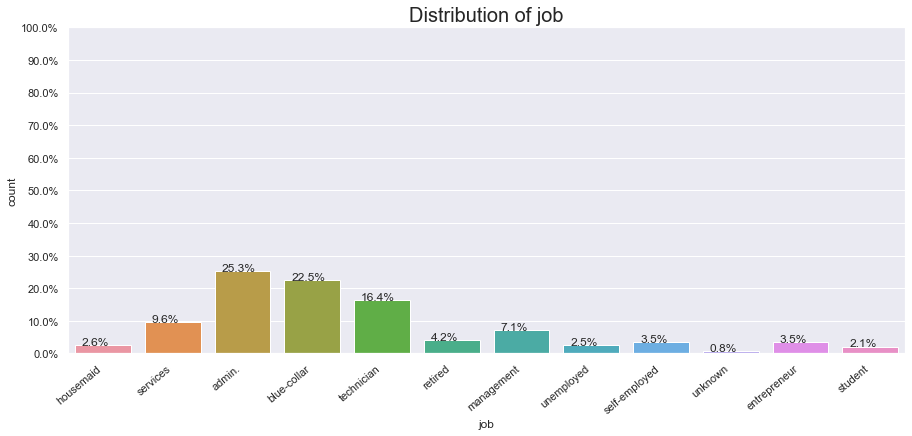

In [300]:
countplot('job', bank_data)

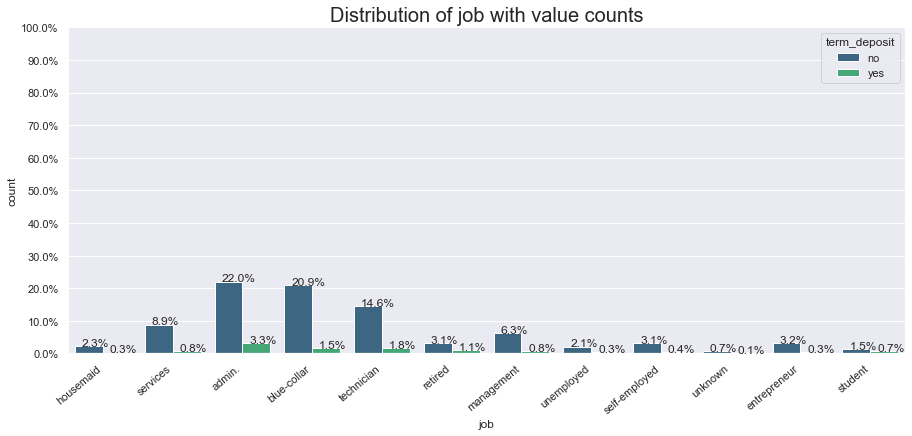

In [303]:
countplot_withY('job', bank_data)

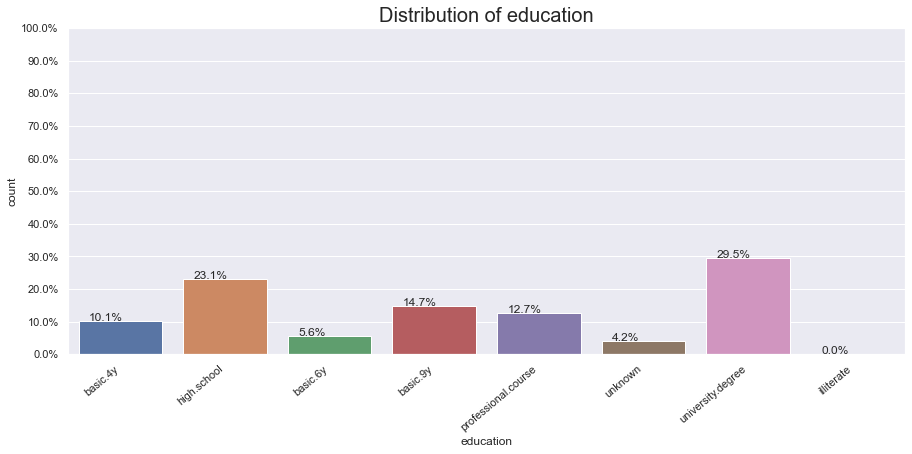

In [304]:
countplot('education', bank_data)

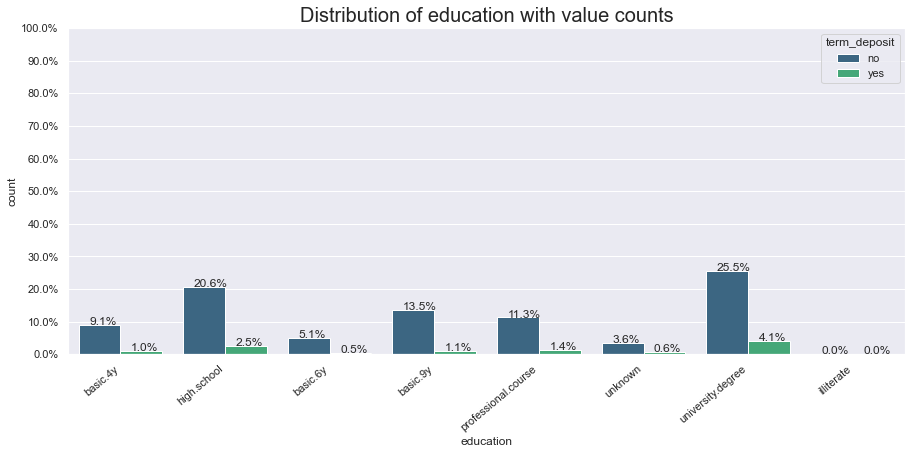

In [305]:
countplot_withY('education', bank_data)

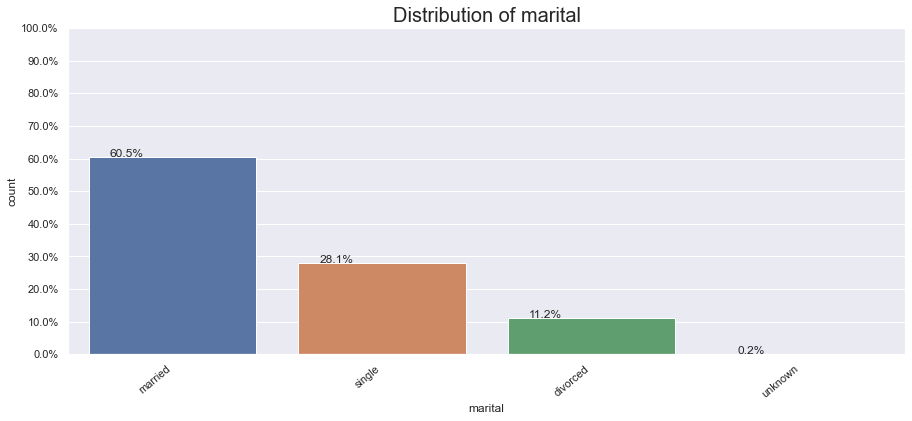

In [306]:
countplot('marital', bank_data)

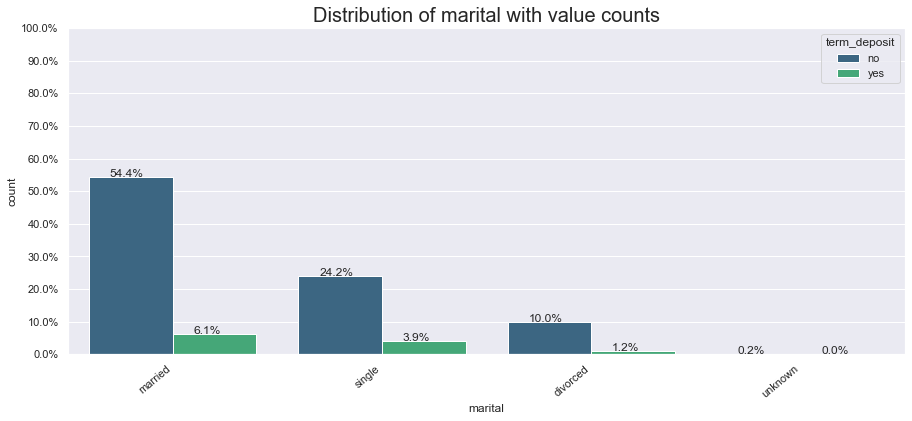

In [307]:
countplot_withY('marital', bank_data)

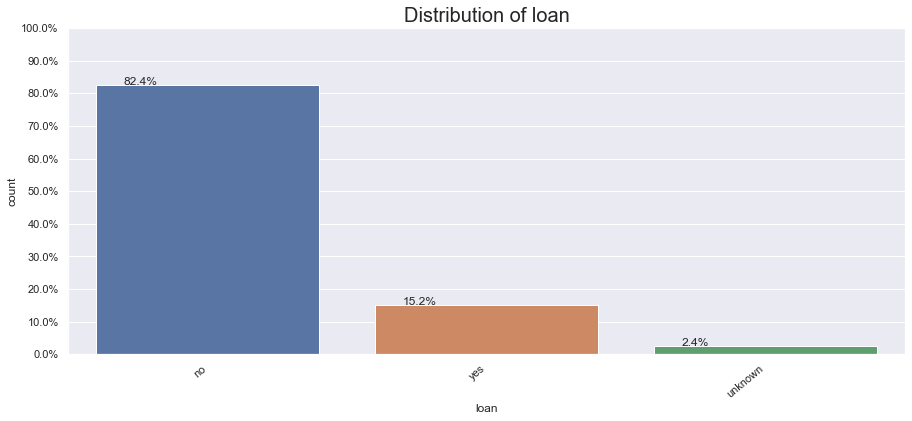

In [308]:
countplot('loan', bank_data)

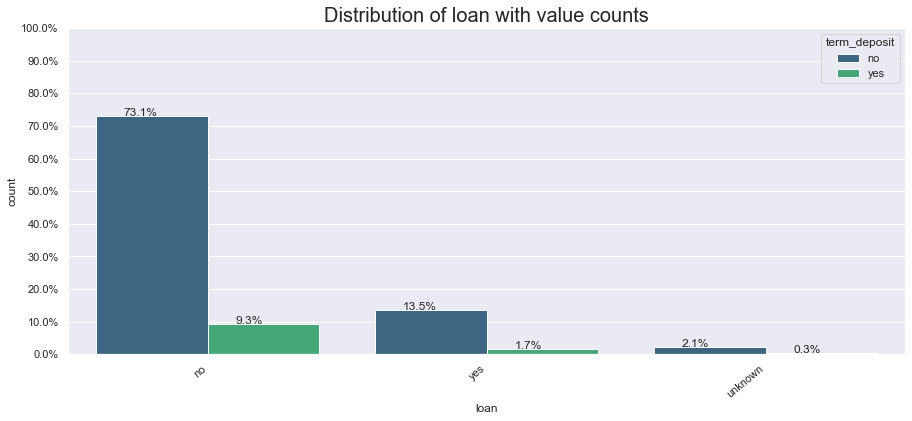

In [309]:
countplot_withY('loan', bank_data)

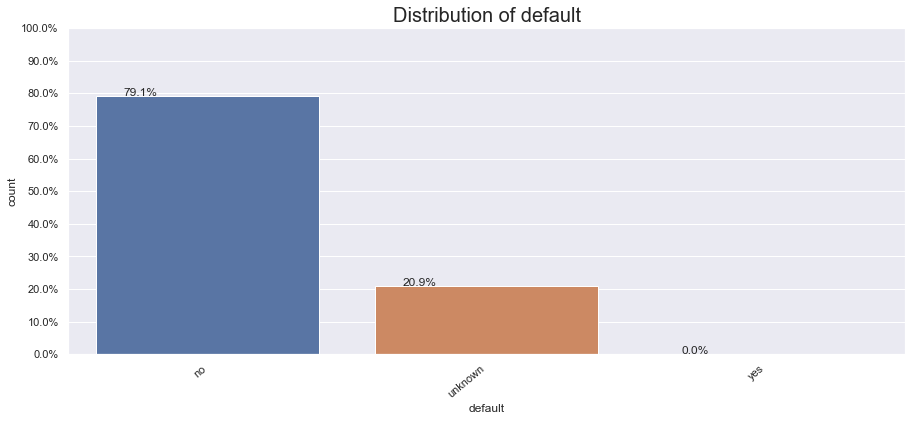

In [310]:
countplot('default', bank_data)

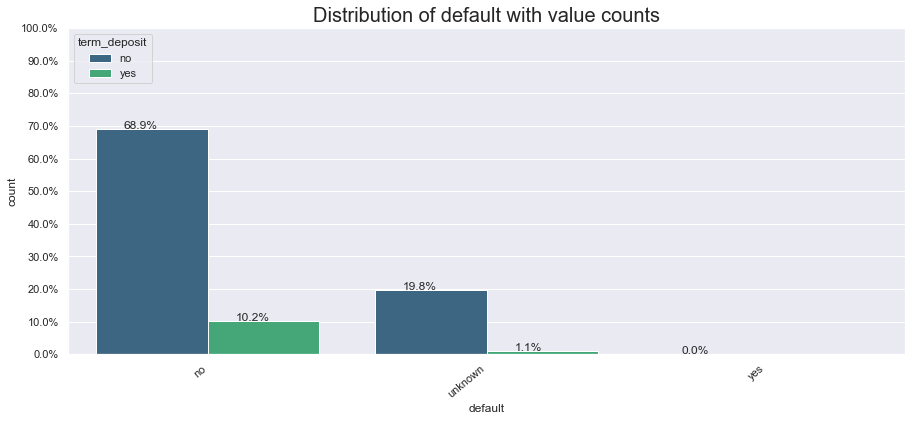

In [311]:
countplot_withY('default', bank_data)

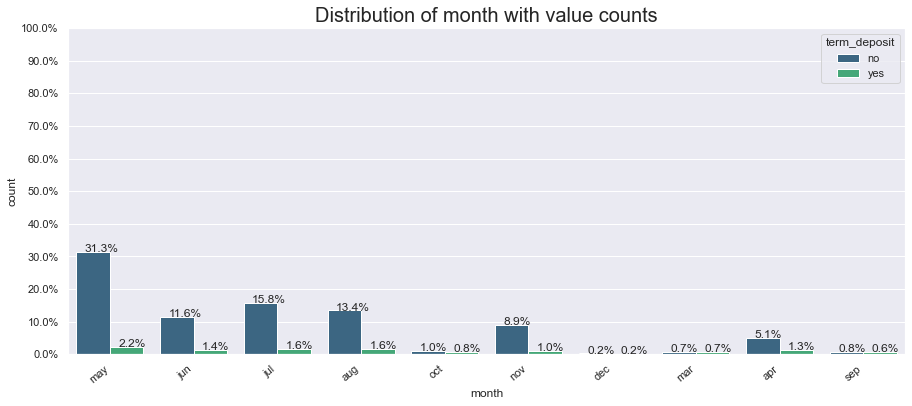

In [10]:
countplot_withY('month', bank_data)

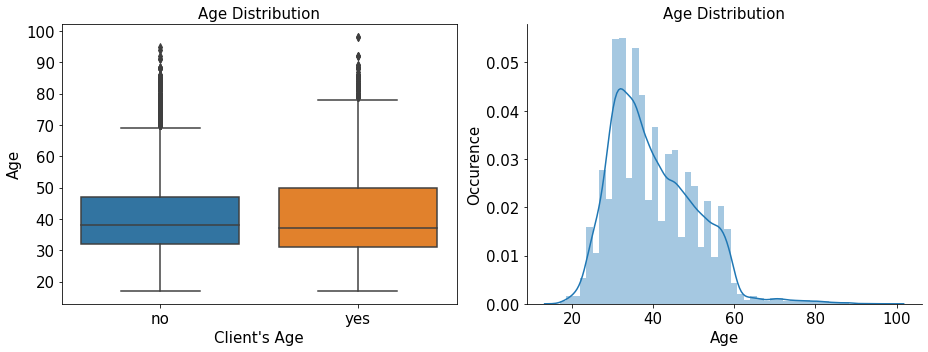

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'term_deposit', y='age', data = bank_data, ax = ax1)
ax1.set_xlabel('Client\'s Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(bank_data['age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age Distribution', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [20]:
# Quartiles
print('1st Quartile: ', bank_data['age'].quantile(q = 0.25))
print('2nd Quartile: ', bank_data['age'].quantile(q = 0.50))
print('3rd Quartile: ', bank_data['age'].quantile(q = 0.75))
print('4th Quartile: ', bank_data['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', bank_data['age'].quantile(q = 0.75) + 
                      1.5*(bank_data['age'].quantile(q = 0.75) - 
                           bank_data['age'].quantile(q = 0.25)), 'are outliers')

1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
Ages above:  69.5 are outliers


Text(0.5, 1.0, 'Age against Term Deposit')

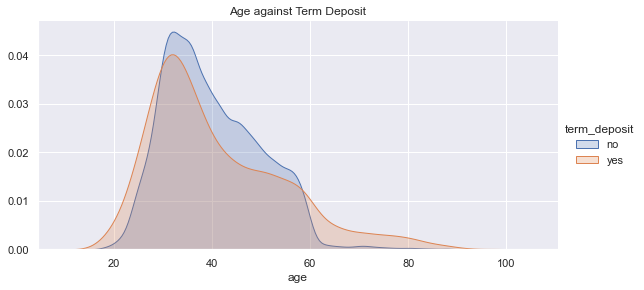

In [317]:
# age against term_deposit
g = sns.FacetGrid(data=bank_data,hue='term_deposit',height=4,aspect=2)
g.map(sns.kdeplot,'age',shade=True,legend=True)
g.add_legend()
plt.title('Age against Term Deposit')
plt.show()

In [44]:
# for col in categorical_col:
#     countplot(col, bank_data)

# for col in categorical_col:
#     countplot_withY(col, bank_data)

#### Correlation of numerical features

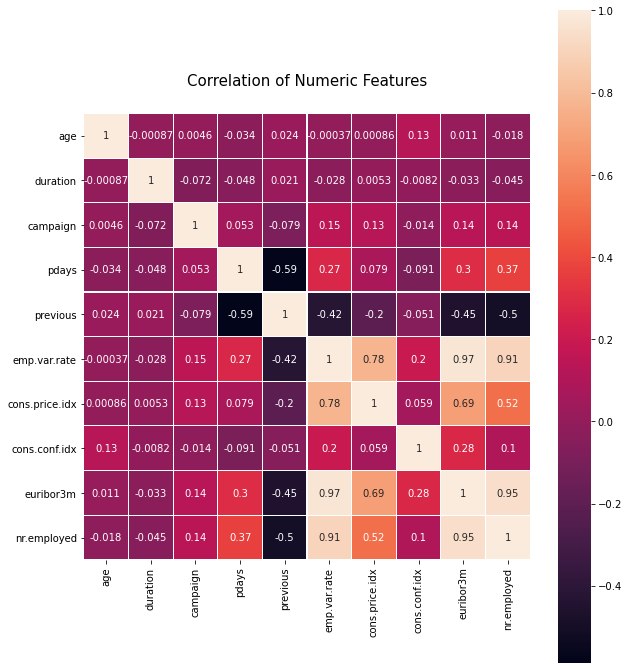

In [21]:
%matplotlib inline
corr = bank_data.corr()

fig, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, square=True, ax=ax, annot=True, linewidth=0.1)
# _ = sns.heatmap(corr, cmap='YlGn', square=True, ax=ax, annot=True, linewidth=0.1)

plt.title('Correlation of Numeric Features', y=1.05, size=15)
plt.show()

We have some numerical features highly correlated to each other, such as euribor3m to previous and nr.employed to previous. We'll review correlation again after transforming our all features to numeric. 

# Data Preprocessing

I will work towards converting all non-numeric features to numeric for modeling purposes. We have 10 categorical columns to clean up. 

In [22]:
# view features and feature types
# quick check for missing values
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [23]:
# check values for each no/yes variable
print(bank_data.term_deposit.value_counts())

bank_data.term_deposit = bank_data.term_deposit.eq('yes').mul(1)

# check values after changing to int
print(bank_data.term_deposit.value_counts())

no     36548
yes     4640
Name: term_deposit, dtype: int64
0    36548
1     4640
Name: term_deposit, dtype: int64


In [24]:
# transform remaining categorical variables
categorical_col = [col for col in bank_data.columns 
                   if bank_data[col].dtypes == 'object']

# get dummies of categorical features
bank_data = pd.get_dummies(bank_data, columns = categorical_col)

In [25]:
# check summary after processing the data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  term_deposit                   41188 non-null  int32  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

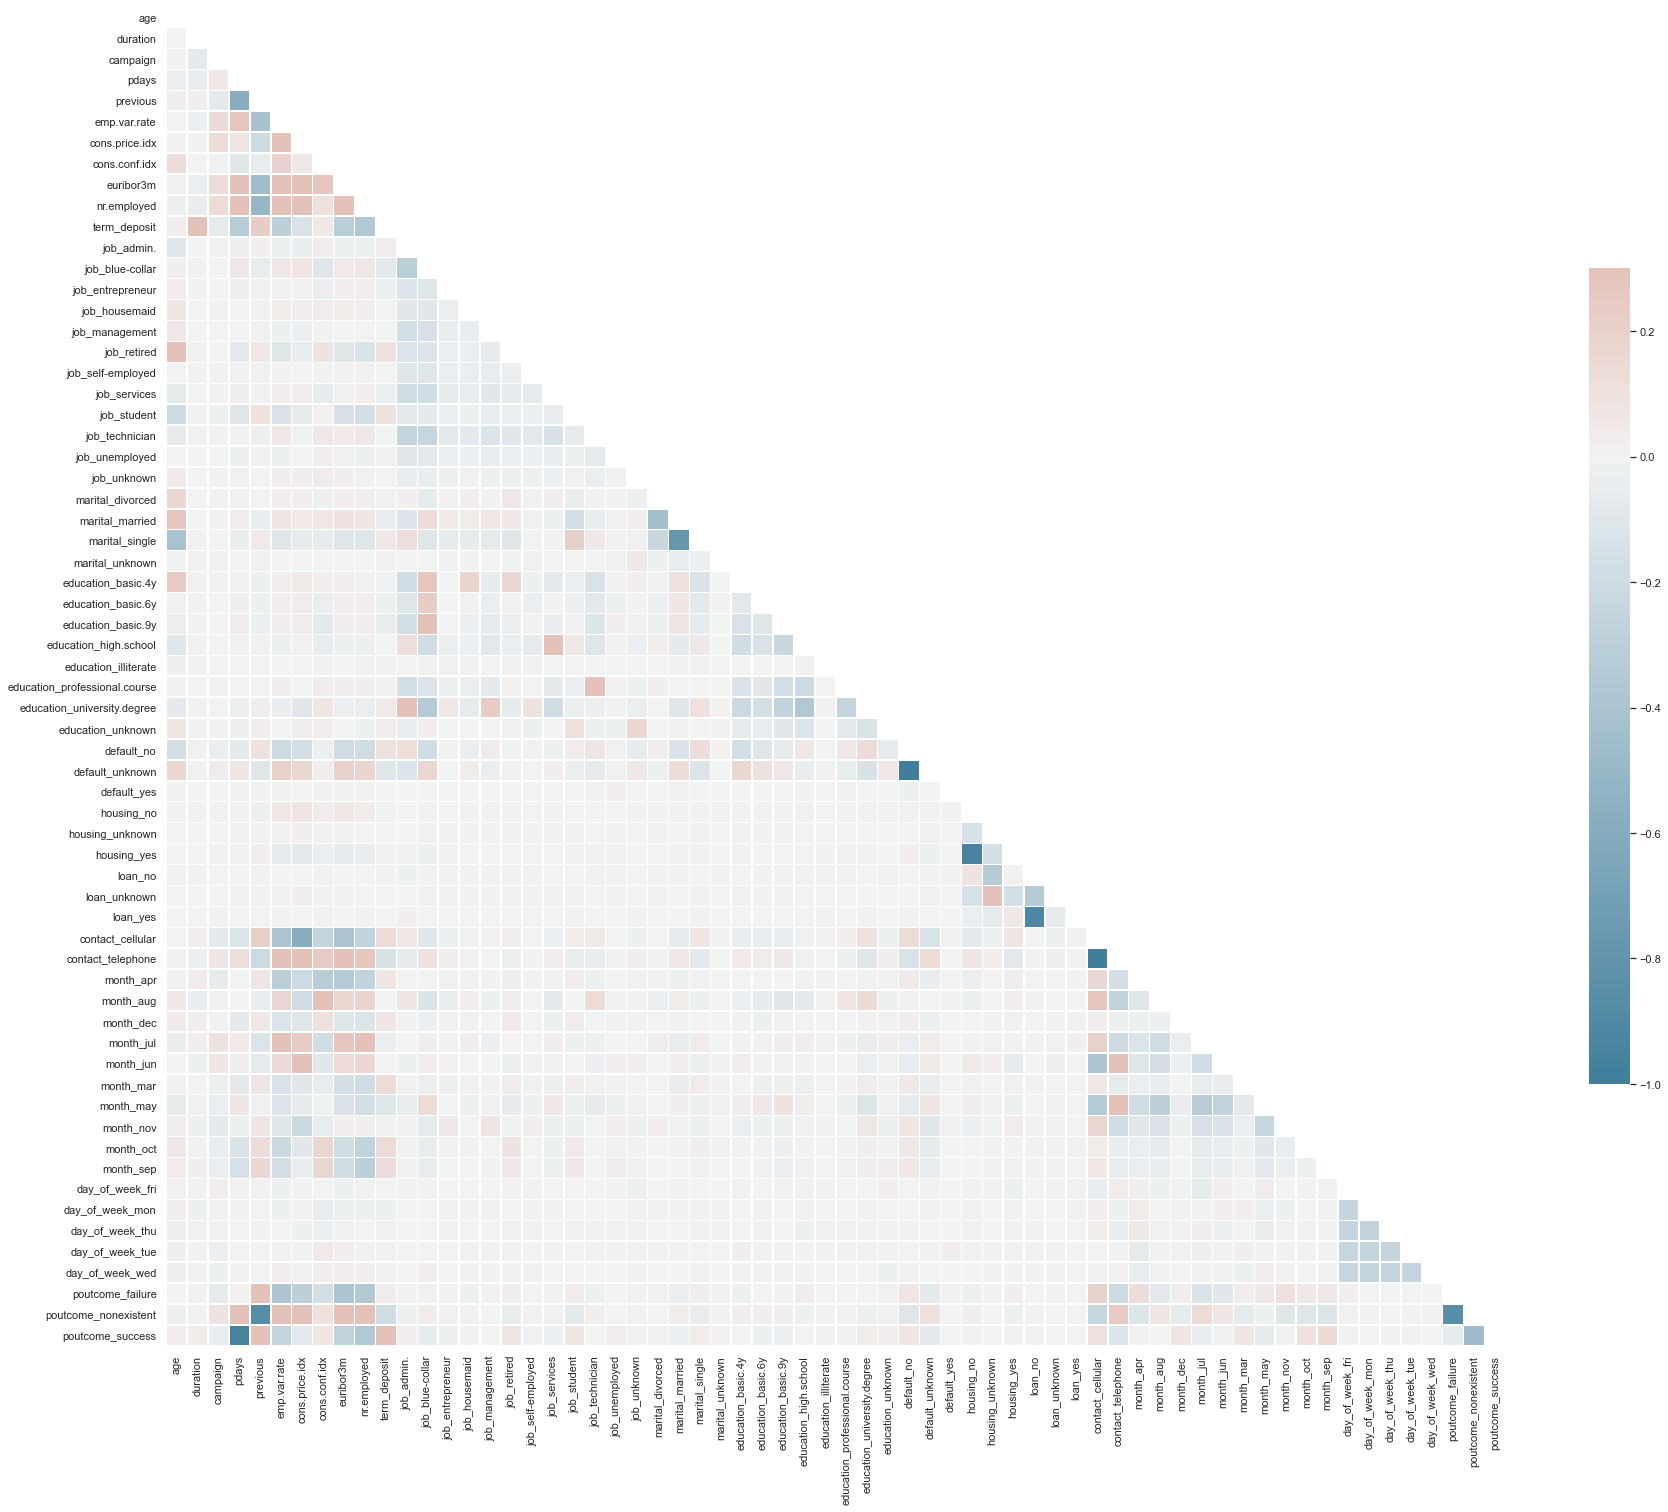

In [26]:
sns.set_theme(style="white") 

# Compute the correlation matrix
corr = bank_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

All our variables are now numerical. After transforming all categorical features to numerica, we checked correlations. We note that some of the features created via encoding are highly correlated to each other. This can be attributed to the features with initially 3 options, such as housing(yes, no, and unknown). 2 of these encoded variables would have information on the third. We can remove one of the encoded variables from the features that initially had three options.   

We can proceed with handling the data imbalance and modeling.

In [27]:
bank_data = bank_data.drop(columns=['housing_unknown', 'loan_unknown', 'poutcome_success'], axis=1)

##### Splitting the Data

In [28]:
# seperate independent and class variables
X = bank_data.drop('term_deposit', axis=1)
Y = bank_data.term_deposit

# check shape of our two variables
print("Shape of X: ", X.shape)
print("Shape of Y: ", Y.shape)

Shape of X:  (41188, 60)
Shape of Y:  (41188,)


In [29]:
from sklearn.model_selection import train_test_split

# split data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 123)
print('Observations in X_train dataset: ', X_train.shape)
print('Observations in y_train dataset: ', y_train.shape)
print('Observations in X_test dataset: ', X_test.shape)
print('Observations in y_test dataset: ', y_test.shape)

Observations in X_train dataset:  (32950, 60)
Observations in y_train dataset:  (32950,)
Observations in X_test dataset:  (8238, 60)
Observations in y_test dataset:  (8238,)


##### Standardization

In [30]:
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.fit_transform(X_test)

##### Simple Linear Regression with original data

In [31]:
# logistic regression object
lr_og = LogisticRegression()

# train model on training set
lr_og.fit(X_train_std, y_train)

lr_og_pred = lr_og.predict(X_test_std)

# print classification report
print(classification_report(y_test, lr_og_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7298
           1       0.70      0.42      0.52       940

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238



Accuracy comes out to 91%. However, we note recall of minority class is 41% and the recall of majority class is 97%. This indicates the model is biased towards majority class. This is not a good model.

We will apply different imbalanced data handling techniques and compare their accuracy and recall results. We will then use the better of the two methods to train our remaining models. 

##### SMOTE

I will use Synthetic Minority Oversampling Technique. It is one of the most commonly used oversampling methods to handle data imbalance. It aims to balance the data by randomly increasing minority class examples by replicating them. 

In [74]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [32]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_smote, y_train_smote = sm.fit_sample(X_train_std, y_train.ravel())

print("Before SMOTE, count of label 1: {}".format(sum(y_train == 1)))
print("Before SMOTE, count of label 0: {} \n".format(sum(y_train == 0)))

print('After SMOTE, the shape of X_train: {}'.format(X_train_smote.shape)) 
print('After SMOTE, the shape of y_train: {} \n'.format(y_train_smote.shape)) 
  
print("After SMOTE, counts of label '1': {}".format(sum(y_train_smote == 1))) 
print("After SMOTE, counts of label '0': {}".format(sum(y_train_smote == 0))) 

Before SMOTE, count of label 1: 3700
Before SMOTE, count of label 0: 29250 

After SMOTE, the shape of X_train: (58500, 60)
After SMOTE, the shape of y_train: (58500,) 

After SMOTE, counts of label '1': 29250
After SMOTE, counts of label '0': 29250


In [33]:
lr2 = LogisticRegression()
lr2.fit(X_train_smote, y_train_smote.ravel())
lr2_pred = lr2.predict(X_test_std)

# print classification report
print(classification_report(y_test, lr2_pred))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7298
           1       0.46      0.89      0.61       940

    accuracy                           0.87      8238
   macro avg       0.72      0.88      0.77      8238
weighted avg       0.92      0.87      0.89      8238



We have reduced accuracy to 86%, but recall score of minority and majority class are now equal at 86% and 87%, respectively.

#### Undersample

In [34]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
X_train_under, y_train_under = nm.fit_sample(X_train_std, y_train.ravel())

print("Before Undersampling, count of label 1: {}".format(sum(y_train == 1)))
print("Before Undersampling, count of label 0: {} \n".format(sum(y_train == 0)))

print('After Undersampling, the shape of X_train: {}'.format(X_train_under.shape)) 
print('After Undersampling, the shape of y_train: {} \n'.format(y_train_under.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_under == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_under == 0))) 

Before Undersampling, count of label 1: 3700
Before Undersampling, count of label 0: 29250 

After Undersampling, the shape of X_train: (7400, 60)
After Undersampling, the shape of y_train: (7400,) 

After Undersampling, counts of label '1': 3700
After Undersampling, counts of label '0': 3700


In [35]:
lr3 = LogisticRegression()
lr3.fit(X_train_under, y_train_under.ravel())
lr3_pred = lr3.predict(X_test_std)

# print classification report
print(classification_report(y_test, lr3_pred))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      7298
           1       0.29      0.87      0.44       940

    accuracy                           0.75      8238
   macro avg       0.64      0.80      0.64      8238
weighted avg       0.90      0.75      0.79      8238



With undersampling, we get an accuracy of 59%. Minority class and majority class recall scores are at 84% and 56%, respectively.

##### Comparison of SMOTE(Oversampling) and Undersampling

In [36]:
# print all classification reports
print('Imbalanced Data:')
print(classification_report(y_test, lr_og_pred))
print()
print('SMOTE Data:')
print(classification_report(y_test, lr2_pred))
print()
print('Undersampled Data:')
print(classification_report(y_test, lr3_pred))

Imbalanced Data:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7298
           1       0.70      0.42      0.52       940

    accuracy                           0.91      8238
   macro avg       0.81      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


SMOTE Data:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7298
           1       0.46      0.89      0.61       940

    accuracy                           0.87      8238
   macro avg       0.72      0.88      0.77      8238
weighted avg       0.92      0.87      0.89      8238


Undersampled Data:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84      7298
           1       0.29      0.87      0.44       940

    accuracy                           0.75      8238
   macro avg       0.64      0.80      0.64      8238
weighted avg       0.90 

With undersampling and SMOTE, our recall score of the minority class increased to 84% and 83%, respectively. However, the accuracy of SMOTE is over 25% higher. We'll proceed with running our models with the SMOTE data. 

# Modeling


I will run LogisticRegression, RandomForest, and MLP classifier and perform parameter tuning. 

##### Logistic Regression

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# logistic Regression params
lr_params = {'C': np.logspace(0, 4, 10), 
             'class_weight': ['balanced'],
             'solver' : ['liblinear', 'saga'],
             'penalty' : ['l1','l2']
            }

lr = LogisticRegression()
lr_clf = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc')
lr_clf.fit(X_train_smote, y_train_smote.ravel())
print()
# logistic regression best params
print('Logistic Regression best parameters: \n',lr_clf.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits

Logistic Regression best parameters: 
 {'C': 1.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}


In [39]:
lr_SMOTE = LogisticRegression(C=1.0, class_weight='balanced', penalty='l2', solver='liblinear')
lr_SMOTE.fit(X_train_smote, y_train_smote)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [77]:
y_pred_LR = lr_SMOTE.predict(X_test_std)

cm_LR = confusion_matrix(y_test, y_pred_LR)
accuracy_LR = lr_SMOTE.score(X_test_std, y_test)

In [116]:
import sklearn.metrics as metrics

def plot_roc_curve(model):
    y_pred_proba = model.predict_proba(X_test_std)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color='orange', label='AUC = %0.3f'% auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    return auc

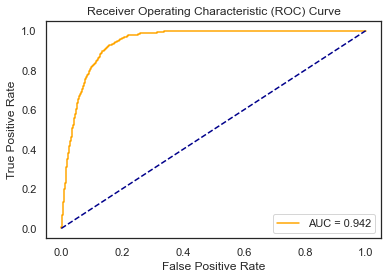

AUC: 0.942325


In [115]:
plot_roc_curve(lr_SMOTE)
print('AUC: %.6f' % auc)

In [80]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      7298
           1       0.46      0.89      0.61       940

    accuracy                           0.87      8238
   macro avg       0.72      0.88      0.77      8238
weighted avg       0.92      0.87      0.89      8238



##### Random Forest Classifier

In [81]:
# tuning level 1
rf_params1 = {'n_estimators' : range(10,100,10),
              'max_depth' : range(3,15,2)}

rf = RandomForestClassifier(warm_start=True)

rf_clf = GridSearchCV(rf,
                      rf_params1,
                      cv=5,
                      verbose=1,
                      n_jobs=-1,
                      scoring='roc_auc')

rf_clf.fit(X_train_smote, y_train_smote.ravel())
print()

# random forest best params
print('Random Forest best parameters1: \n',rf_clf.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Random Forest best parameters1: 
 {'max_depth': 13, 'n_estimators': 70}


In [82]:
# tuning level 2
rf_params2 = {'max_features' : range(7, 53, 9),
          'criterion' : ['gini', 'entropy']}

rf = RandomForestClassifier(warm_start=True, n_estimators=70, max_depth=13)

rf_clf = GridSearchCV(rf,
                      rf_params2,
                      cv=5,
                      verbose=1,
                      n_jobs=-1,
                      scoring='roc_auc')

rf_clf.fit(X_train_smote, y_train_smote.ravel())

# random forest best params
print('Random Forest best parameters2: \n',rf_clf.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Random Forest best parameters2: 
 {'criterion': 'entropy', 'max_features': 34}


In [104]:
# final rf model 
rf_SMOTE = RandomForestClassifier(n_estimators=70, max_depth=13, max_features=34, criterion='entropy')
rf_SMOTE.fit(X_train_smote, y_train_smote.ravel())

y_pred_RF = rf_SMOTE.predict(X_test_std)
cm_RF = confusion_matrix(y_test, y_pred_RF)
accuracy_RF = rf_SMOTE.score(X_test_std, y_test)

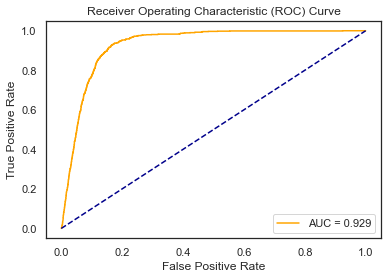

AUC: 0.928862


In [119]:
# plot_roc_curve(rf_SMOTE)
# auc = plot_roc_curve(rf_SMOTE)
print('AUC: %.6f' % plot_roc_curve(rf_SMOTE))

In [120]:
# print classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.99      0.78      0.87      7298
           1       0.36      0.96      0.52       940

    accuracy                           0.80      8238
   macro avg       0.68      0.87      0.70      8238
weighted avg       0.92      0.80      0.83      8238



##### MLP Classifier

In [86]:
# tuning level 1
from sklearn.neural_network import MLPClassifier

mlp_params1 = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu']}

mlp = MLPClassifier(max_iter=500)

mlp_clf = GridSearchCV(mlp, mlp_params1, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc')

mlp_clf.fit(X_train_smote, y_train_smote.ravel())
print()

# MLP best params
print('MLPClassifier best parameters1: \n',mlp_clf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

MLPClassifier best parameters1: 
 {'activation': 'relu', 'hidden_layer_sizes': (100,)}


In [87]:
# tuning level 2
mlp_params2 = {'solver': ['sgd', 'adam'],
               'alpha': [0.0001, 0.05],
               'learning_rate': ['constant', 'adaptive']}

mlp = MLPClassifier(max_iter=500, hidden_layer_sizes= (100,), activation='relu')

mlp_clf = GridSearchCV(mlp, mlp_params2, cv=5, verbose=1, n_jobs=-1, scoring='roc_auc')

mlp_clf.fit(X_train_smote, y_train_smote.ravel())
print()

# MLP best params
print('MLPClassifier best parameters2: \n',mlp_clf.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits

MLPClassifier best parameters2: 
 {'alpha': 0.05, 'learning_rate': 'adaptive', 'solver': 'adam'}


In [88]:
# final mlp model 
mlp_SMOTE = MLPClassifier(max_iter=500, hidden_layer_sizes= (100,), activation='relu',
                         alpha=0.05, learning_rate='adaptive', solver='adam')
mlp_SMOTE.fit(X_train_smote, y_train_smote.ravel())

y_pred_MLP = mlp_SMOTE.predict(X_test_std)
cm_MLP = confusion_matrix(y_test, y_pred_MLP)
accuracy_MLP = mlp_SMOTE.score(X_test_std, y_test)

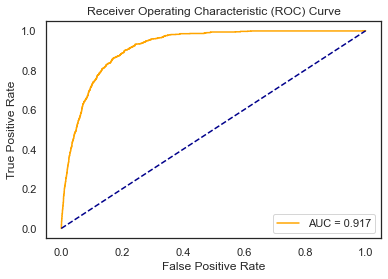

AUC: 0.917358


In [121]:
# plot_roc_curve(mlp_SMOTE)
print('AUC: %.6f' % plot_roc_curve(mlp_SMOTE))

In [122]:
# print classification report
print(classification_report(y_test, y_pred_MLP))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      7298
           1       0.52      0.64      0.57       940

    accuracy                           0.89      8238
   macro avg       0.74      0.78      0.76      8238
weighted avg       0.90      0.89      0.90      8238



# Results: 

All model metrics and plots are below to review. 

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(C=1.0, class_weight='balanced', penalty='l2', solver='liblinear'),
               RandomForestClassifier(n_estimators=70, max_depth=13, max_features=34, criterion='entropy'),
               MLPClassifier(max_iter=500, hidden_layer_sizes= (100,), activation='relu',
                             alpha=0.05, learning_rate='adaptive', solver='adam')]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_std, y_train)
    yproba = model.predict_proba(X_test_std)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [124]:
result_table['auc']

classifiers
LogisticRegression        0.942290
RandomForestClassifier    0.935855
MLPClassifier             0.930300
Name: auc, dtype: float64

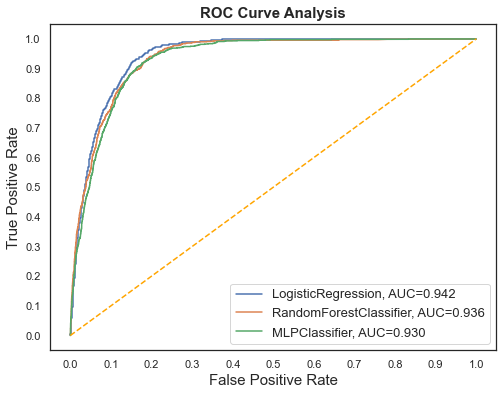

In [125]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:
# code to export figure
fig.savefig('multiple_roc_curve.png')

# Best Model: Logistic Regression

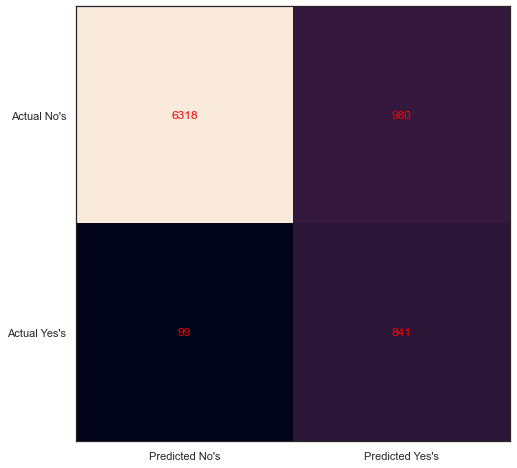

In [152]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_LR)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted No\'s', 'Predicted Yes\'s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual No\'s', 'Actual Yes\'s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_LR[i, j], ha='center', va='center', color='red')
plt.show()

In [153]:
# class_names= ['No','Yes'] # name  of classes
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)

# # create heatmap
# sns.heatmap(cm_LR, annot=True, cmap="YlGnBu" ,fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title('Confusion matrix', y=1.1)
# plt.ylabel('Actual label')
# plt.xlabel('Predicted label')
# plt.show()

In [132]:
# get importance
importances = lr_SMOTE.coef_[0]
features = X_train.columns
indices = np.argsort(importances)

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
print()

Feature: 0, Score: 0.01205
Feature: 1, Score: 1.97703
Feature: 2, Score: -0.17077
Feature: 3, Score: -0.16897
Feature: 4, Score: -0.08512
Feature: 5, Score: -4.06044
Feature: 6, Score: 1.57873
Feature: 7, Score: -0.03099
Feature: 8, Score: 1.43435
Feature: 9, Score: 0.33695
Feature: 10, Score: 0.03139
Feature: 11, Score: -0.08000
Feature: 12, Score: -0.02440
Feature: 13, Score: 0.00690
Feature: 14, Score: -0.02315
Feature: 15, Score: 0.10331
Feature: 16, Score: -0.01453
Feature: 17, Score: -0.05835
Feature: 18, Score: 0.07633
Feature: 19, Score: 0.02692
Feature: 20, Score: 0.03071
Feature: 21, Score: 0.02835
Feature: 22, Score: -0.09123
Feature: 23, Score: 0.01656
Feature: 24, Score: 0.04934
Feature: 25, Score: -0.03317
Feature: 26, Score: -0.04020
Feature: 27, Score: -0.02709
Feature: 28, Score: -0.04943
Feature: 29, Score: -0.04616
Feature: 30, Score: 0.00959
Feature: 31, Score: 0.02847
Feature: 32, Score: 0.10833
Feature: 33, Score: -0.01931
Feature: 34, Score: 0.10034
Feature: 35, 

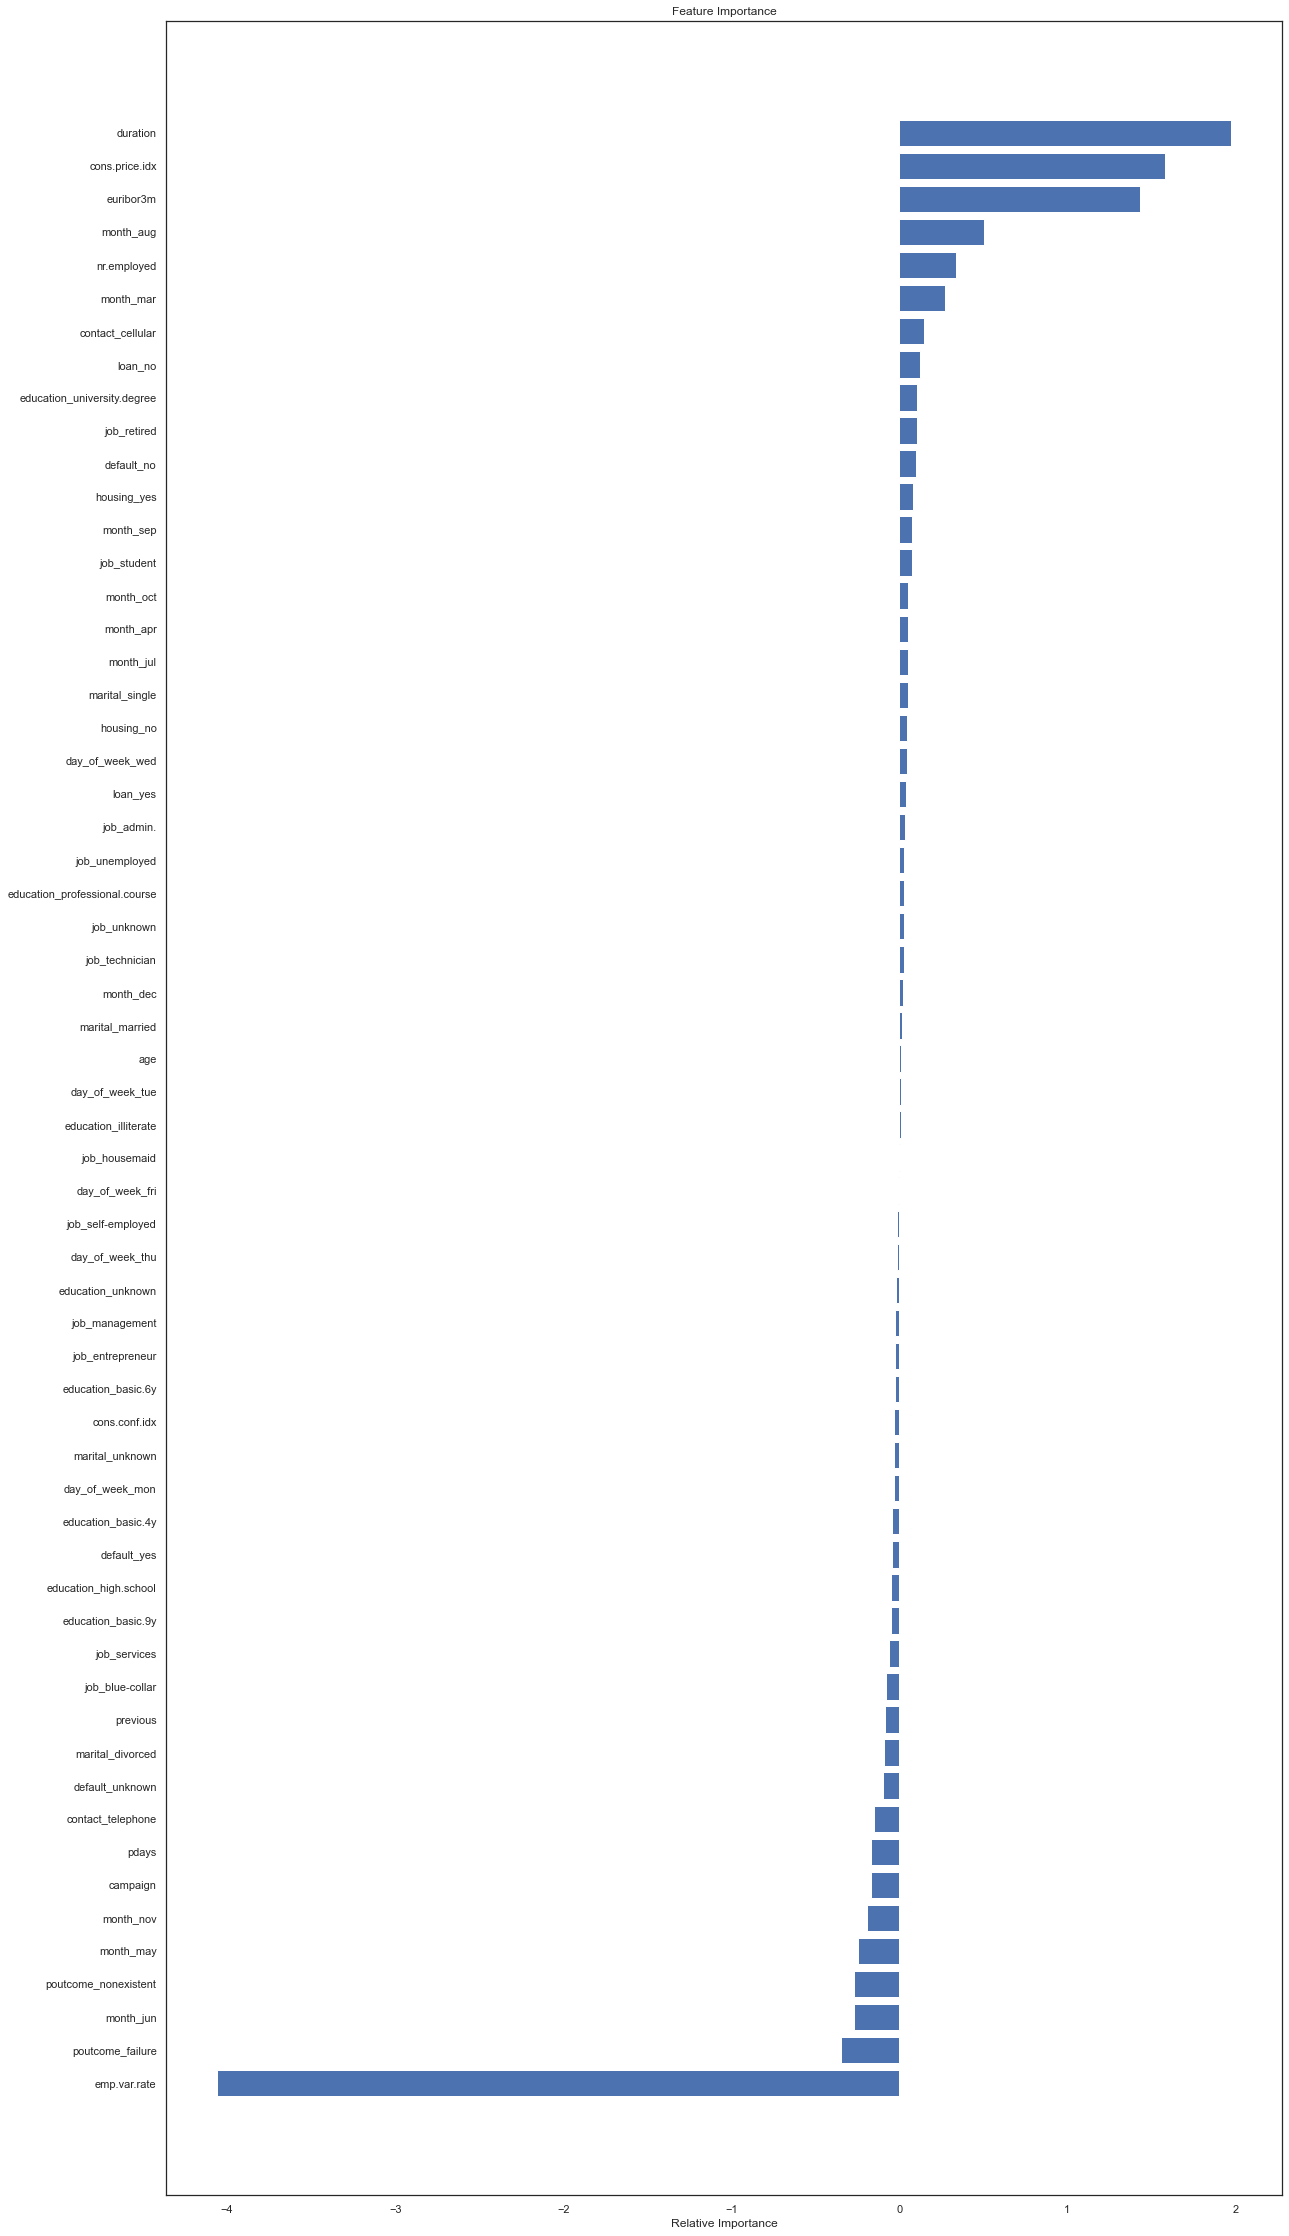

In [133]:
plt.figure(figsize=(20,40))
# plot feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

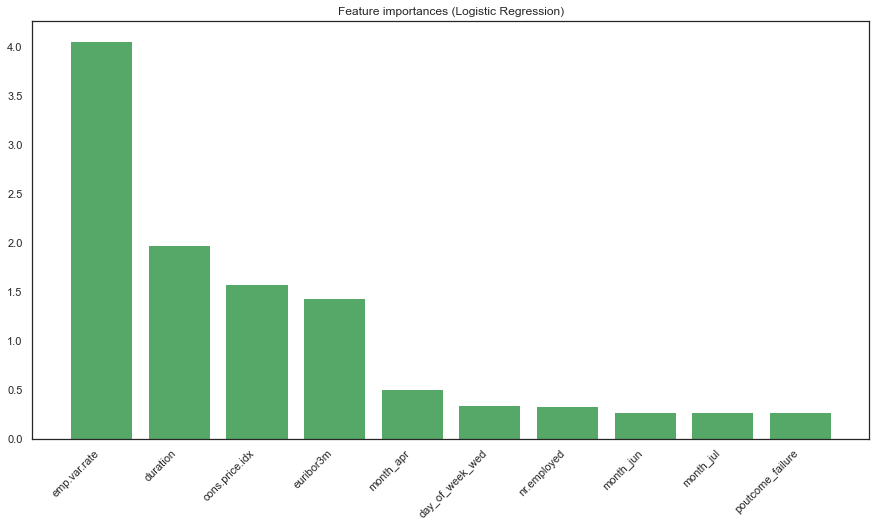

In [134]:
coefs = np.abs(lr_SMOTE.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure(figsize=(15,10))
plt.title("Feature importances (Logistic Regression)")
plt.bar(range(10), coefs[indices[:10]],
       color="g", align="center")
plt.xticks(range(10), bank_data.columns[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.ion(); plt.show()

##### Client Insights:
1. Minimum age of clients is 17, the maximum age is 98. The average age is 38. Majority of our customers range from age 20 to 65. Ages above 69.5 are outliers. Age won't be a good indicator of subscription as the distribution of age of those that sign up vs those that do not is similar in range.
2. 60.2% of our customers are married. Of those that are married, 6.1% sign up for term deposit.
3. Over 50% of our clients have a secondary education. 5.4% of those sign up for term deposit.

##### Effective Marketing Campaign Solutions:
1. Largest volume of calls happen in the summer months and weakest in the colder months. In particular, the highest volume occurs in May. This is also when we have the highest rejection of term deposits, approximately 31.3%. For the following campaing, increase campaining efforts during March, September, December, and October.
2. From the above Feature Importance chart, we see that employment variability index(emp.var.rate), duration, consumer price index(cons.price.idx), and Europe's Labor rate(euribor3m) are the most important features that drive the decision of the customer to purchase the term deposit or not.

## Conclusion and Future Recommendations:

The best performing model was Logistic Regression with an AUC score of 94.2%. 


For future runs of the models, I would work to more closely fine tune our models. Due to run times, I did not fine-tune past a few levels. With more time, I would additionally test out more classification models.